<a href="https://colab.research.google.com/github/WenluXu/Data-Science-Bootcamp-2022/blob/main/Week5_ML1_to_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a Machine Learning model for regression problem

In [ ]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelBinarizer, Normalizer
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [ ]:
## 5 features
y = a0 + a1x1 +a2x2 + a3x3 ... a6x6

#A linear regression model describes the relationship between a dependent variable,
# y, and one or more independent variables, X. The dependent variable is also called the response variable.
# Independent variables are also called explanatory or predictor variables.

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

## Data Wrangling & Visualization

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [ ]:
# Dimensions of training data
data.shape

(4277, 13)

In [ ]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [ ]:
# Explore columns
data.columns

Index(['id', 'timestamp', 'country', 'employment_status', 'job_title',
       'job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [ ]:
# Description
data.describe()

,id,job_years,hours_per_week,telecommute_days_per_week,salary
count,4277.00000,4277.000000,4260.000000,4266.000000,4277.000000
mean,2139.00000,4.479697,40.859110,1.034927,7057.701984
std,1234.80788,1.990783,1.754911,1.651160,1308.572568
min,1.00000,0.000000,37.000000,0.000000,3622.000000
25%,1070.00000,3.407156,40.000000,0.000000,6496.788236
50%,2139.00000,4.640830,40.000000,0.000000,7166.000000
75%,3208.00000,5.000000,41.114138,1.000000,7614.831964
max,4277.00000,10.000000,45.000000,5.000000,10625.000000


In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             4277 non-null   int64  
 1   timestamp                      4277 non-null   object 
 2   country                        4277 non-null   object 
 3   employment_status              4277 non-null   object 
 4   job_title                      4277 non-null   object 
 5   job_years                      4277 non-null   float64
 6   is_manager                     4277 non-null   object 
 7   hours_per_week                 4260 non-null   float64
 8   telecommute_days_per_week      4266 non-null   float64
 9   education                      4277 non-null   object 
 10  is_education_computer_related  4261 non-null   object 
 11  certifications                 4277 non-null   object 
 12  salary                         4277 non-null   f

In [ ]:
# Check Datatypes
data.dtypes

id                                 int64
timestamp                         object
country                           object
employment_status                 object
job_title                         object
job_years                        float64
is_manager                        object
hours_per_week                   float64
telecommute_days_per_week        float64
education                         object
is_education_computer_related     object
certifications                    object
salary                           float64
dtype: object

In [ ]:
# Print total missing values in each column
data.isnull().sum()

id                                0
timestamp                         0
country                           0
employment_status                 0
job_title                         0
job_years                         0
is_manager                        0
hours_per_week                   17
telecommute_days_per_week        11
education                         0
is_education_computer_related    16
certifications                    0
salary                            0
dtype: int64

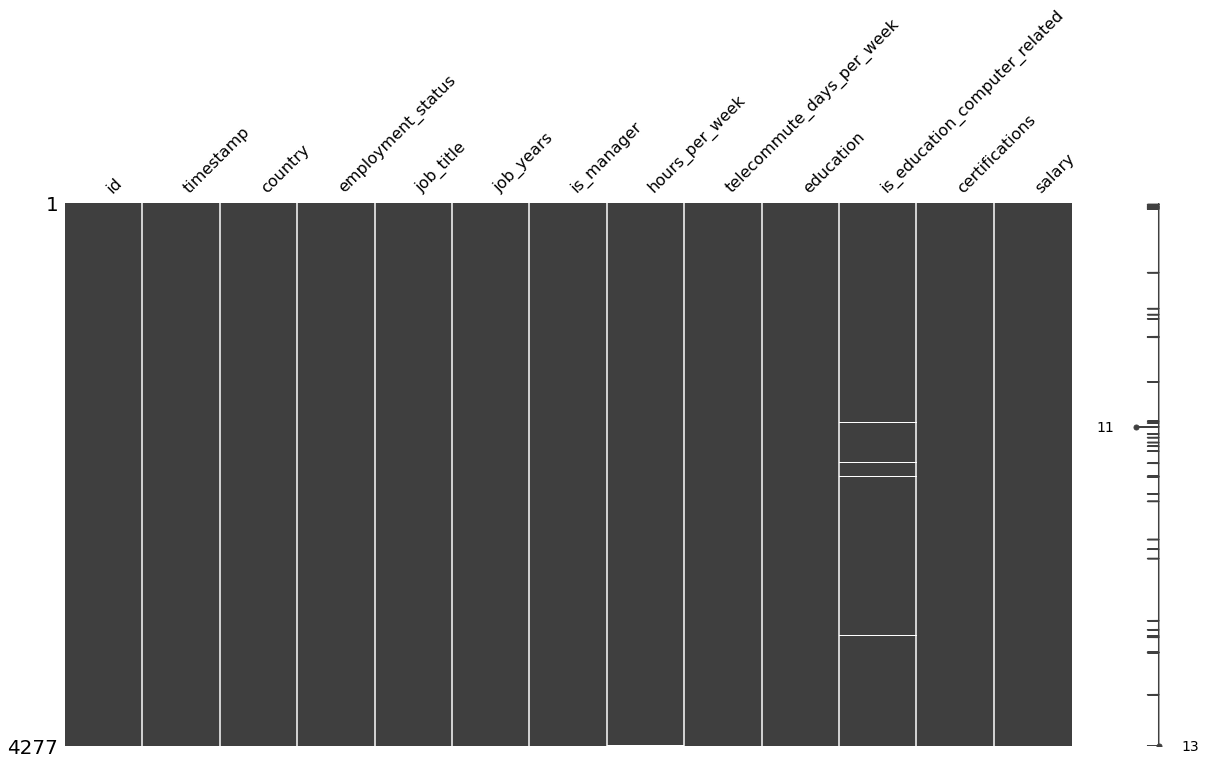

In [ ]:
## Check the distribution for the null values
mno.matrix(data, figsize = (20, 10))

In [ ]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

##### Next We have the some missing values in is_education_computer_related column which is a categorical variable. So we can't just impute these missing values. Best way to deal with it is to remove all rows for which this column has a nan.

In [ ]:
# drop missing vals
data = data.dropna()

In [ ]:
# now check total missing vals in every column
data.isnull().sum()

id                               0
timestamp                        0
country                          0
employment_status                0
job_title                        0
job_years                        0
is_manager                       0
hours_per_week                   0
telecommute_days_per_week        0
education                        0
is_education_computer_related    0
certifications                   0
salary                           0
dtype: int64

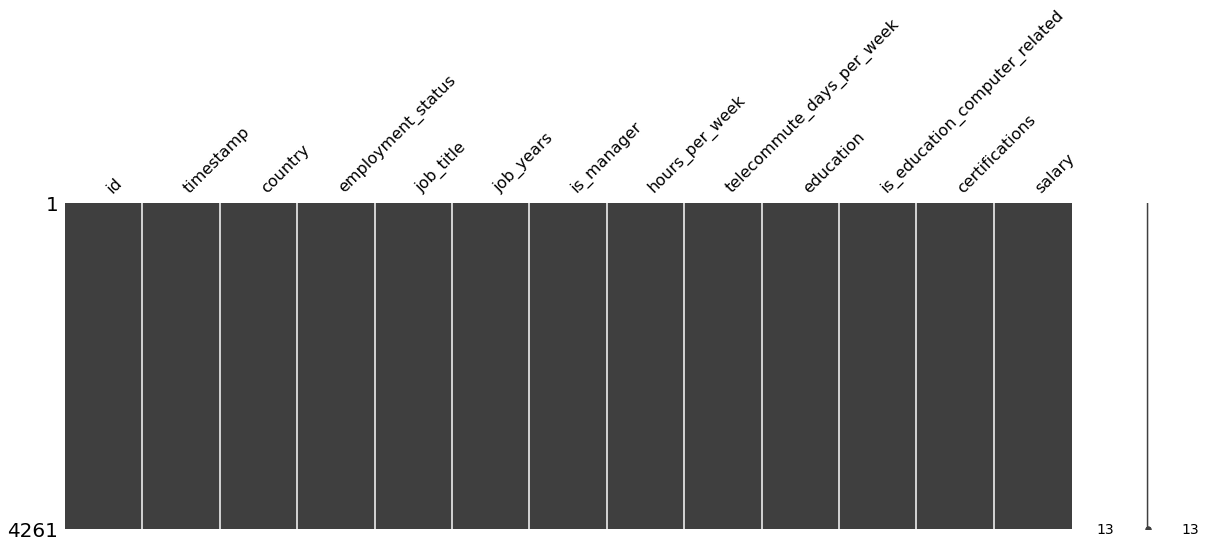

In [ ]:
# Confirm that all missing values are gone.
mno.matrix(data, figsize = (20, 6))

## Visualization, Modeling, Machine Learning

Build a model that can predict salary and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
# Loading Test data
test = pd.read_csv('test.csv')
test.shape

(1070, 12)

In [ ]:
# Print first couple of rows of test data
test.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications
0,1,12/13/2018 10:23:29,Ukraine,Full time,Developer,5.0,No,40.0,5,Doctorate/PhD,Yes,Yes
1,2,12/21/2017 3:51:48,United Kingdom,Full time,Developer,10.0,Yes,40.0,1,None (no degree completed),Unknown,No
2,3,12/23/2017 12:31:05,United States,Full time,Developer,3.0,No,40.0,0,Associates (2 years),Yes,Yes
3,4,12/14/2017 22:09:43,Canada,Full time,Analyst,5.0,No,40.0,0,Bachelors (4 years),Yes,No
4,5,1/2/2018 13:29:11,United States,Full time,DBA,5.0,Yes,40.0,0,Bachelors (4 years),Yes,No


In [ ]:
# check if there are any missing vals in test data or not
test.isnull().sum()

id                                0
timestamp                         0
country                           0
employment_status                 0
job_title                         0
job_years                         0
is_manager                        0
hours_per_week                   13
telecommute_days_per_week         0
education                         0
is_education_computer_related     0
certifications                    0
dtype: int64

In [ ]:
# impute missing vals in hours_per_week column in test data with median value
test.loc[test['hours_per_week'].isna(), 'hours_per_week'] = test['hours_per_week'].median()

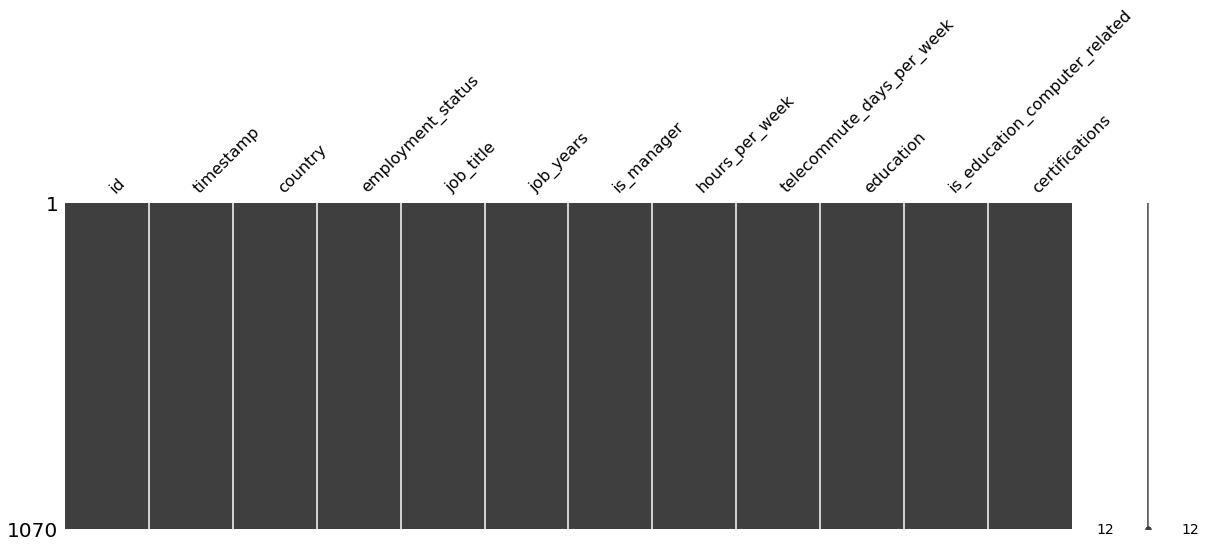

In [ ]:
# Confirm that all missing values are gone in test data.
mno.matrix(test, figsize = (20, 6))

In [ ]:
# let's encode the categorical features in data only for analysis

train_data = data.copy()

cols = ['employment_status', 'job_title', 'is_manager', 'certifications',
        'education', 'is_education_computer_related']

for c in cols: # traverse each column
    for i, item in enumerate(train_data[c].unique().tolist()):
      ## for a column create traverse all unique values in it using 'item'
        train_data.loc[train_data[c] == item, c] = i

    print("Actual values in column:", c, "\n",  data[c].unique().tolist(), '\n')
    print("Encoded values in column:", c, "\n", train_data[c].unique().tolist(), '\n')

Actual values in column: employment_status 
 ['Full time', 'Independent or freelancer or company owner', 'Part time'] 

Encoded values in column: employment_status 
 [0, 1, 2] 

Actual values in column: job_title 
 ['Developer', 'DBA', 'Other', 'Data Scientist', 'Manager', 'Architect', 'Analyst', 'Engineer', 'Sales', 'Analytics consultant', 'Principal database engineer', 'Sr Consultant '] 

Encoded values in column: job_title 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

Actual values in column: is_manager 
 ['Yes', 'No'] 

Encoded values in column: is_manager 
 [0, 1] 

Actual values in column: certifications 
 ['No', 'Yes'] 

Encoded values in column: certifications 
 [0, 1] 

Actual values in column: education 
 ['Bachelors (4 years)', 'Masters', 'Associates (2 years)', 'None (no degree completed)', 'Doctorate/PhD'] 

Encoded values in column: education 
 [0, 1, 2, 3, 4] 

Actual values in column: is_education_computer_related 
 ['Yes', 'No', 'Unknown'] 

Encoded values in column: is_e

Cardinal column--- column has a lot of unique value takes longer time to train the data.

We can't replace the different catogery with number. If you do it, it will create the bias.

Country, job_title are cardinal column.

In [ ]:
train_data.columns

Index(['id', 'timestamp', 'country', 'employment_status', 'job_title',
       'job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

### Visualizations

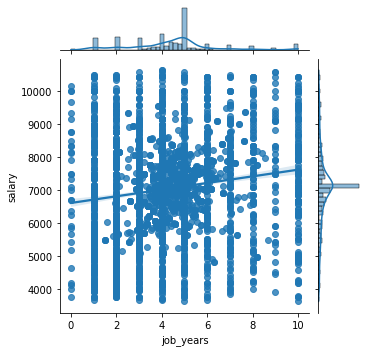

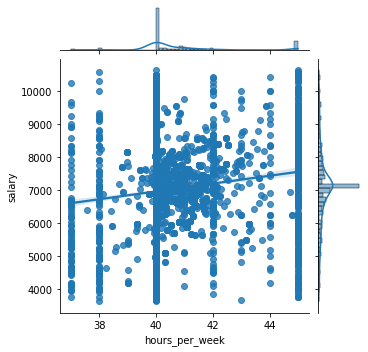

In [ ]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

##### From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary).

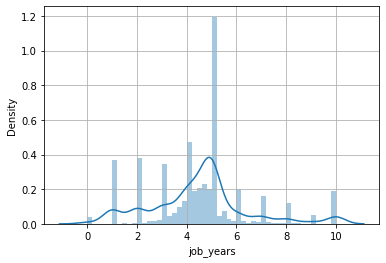

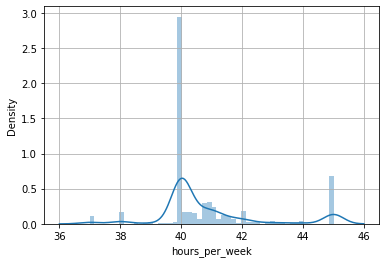

In [ ]:
# dist plots for numeric variables
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

##### The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimdal distribution showing that most people work from 40 to 45 hours per week.

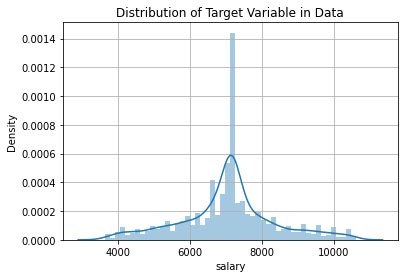

max: 10625.0
min: 3622.0


In [ ]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

##### For target variable i.e. salary we can see a smooth normal distribution with a bulge at the mean salary point.

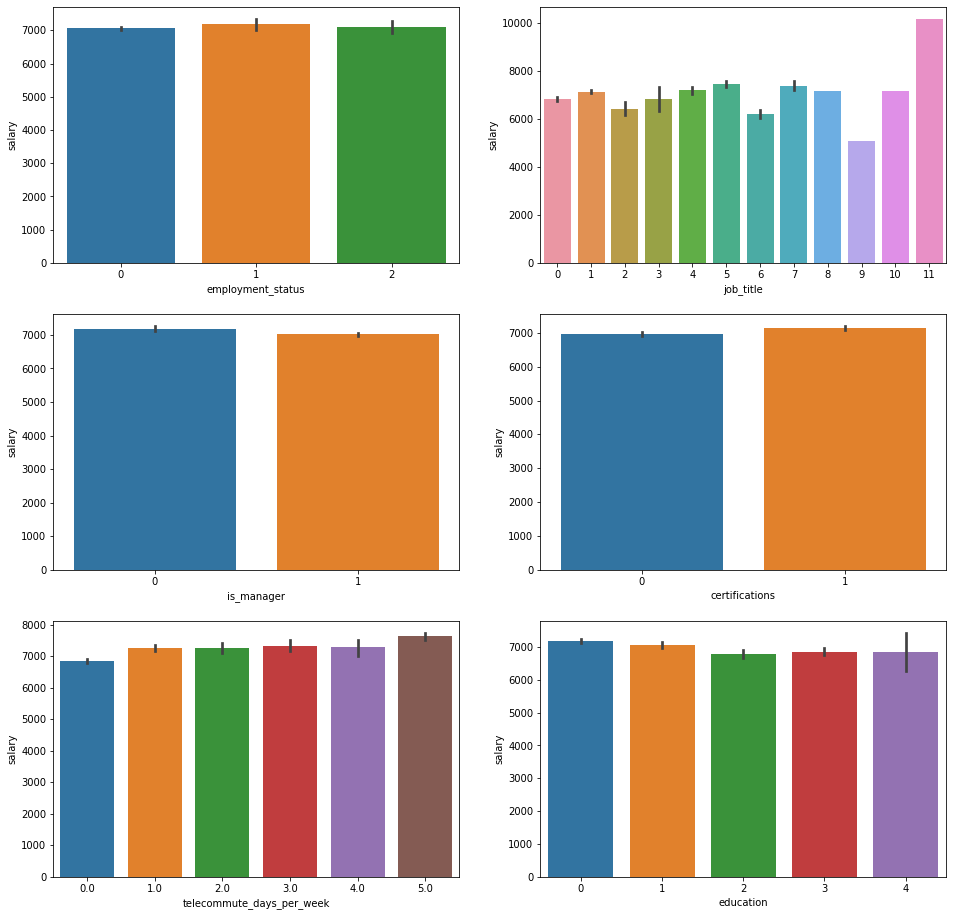

In [ ]:
# bar plots for categorical features
cols = ['employment_status', 'job_title', 'is_manager', 'certifications',
        'telecommute_days_per_week', 'education']

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

for i, c in enumerate(cols):
    ax = axes.ravel()[i]
    sns.barplot(x=c, y="salary", ax=ax, data=train_data)

In [ ]:
# print actual values for encoded labels of a column against which salary is highest
print(data['employment_status'].unique().tolist()[1])
print(data['job_title'].unique().tolist()[11])
print(data['is_manager'].unique().tolist()[0])
print(data['certifications'].unique().tolist()[1])
print(data['telecommute_days_per_week'].unique().tolist()[5])
print(data['education'].unique().tolist()[0])

Independent or freelancer or company owner
Sr Consultant 
Yes
Yes
3.0
Bachelors (4 years)


#####  We see the following trends from above plots:
1. People with employment_status = 1 i.e. 'Independent consultant, contractor, freelancer,  or company owner' earn more than full and half time employees.
2. People with job_title Sr Consultant earn more than other professionals.
3. We also see that people who hold manegrial positions earn more than those who don't.
4. People with certifications have little difference in monthly salary than those who don't.
5. For people having 3 or more telecommute_days_per_week, have higher salaries which might suggest that these people are actually independent contractors or freelancers.
6. As for education, the trend shows taht people with a Bachelors degree of 4 years earn more as compared to others.

In [ ]:
train_data.columns

Index(['id', 'timestamp', 'country', 'employment_status', 'job_title',
       'job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

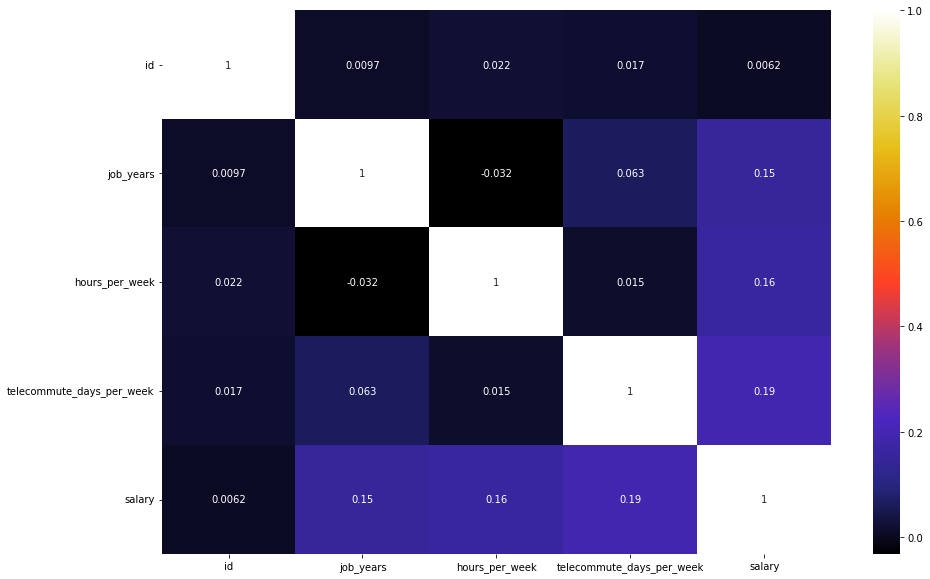

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr(), cmap="CMRmap", annot=True)
plt.show()

##### The correlation matrix above shows that there is no correlation among the features.

### Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [ ]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()

data_train.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [ ]:
# drop id, timestamp and country columns
data_train = data_train.drop(columns=['id', 'timestamp'])

In [ ]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols


['country',
 'employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [ ]:
data_train.shape

(4261, 11)

In [ ]:
# encode binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [ ]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)

final_data.shape

(4261, 102)

In [ ]:
final_data.head()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,country_Argentina,country_Australia,country_Austria,country_Bahrain,country_Belarus,country_Belgium,country_Bolivia,country_Brazil,country_Bulgaria,country_Canada,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Czech Republic,country_Denmark,country_Ecuador,country_Estonia,country_Finland,country_France,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Guernsey,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Ireland,country_Israel,country_Italy,country_Jersey,country_Jordan,country_Kenya,country_Latvia,country_Lithuania,country_Luxembourg,country_Macedonia,country_Malaysia,country_Malta,country_Mexico,country_Moldova,...,country_Norway,country_Pakistan,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Romania,country_Russia,country_Saudi Arabia,country_Serbia and Montenegro,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.78393,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.00000,0,40.0,5.0,0,10000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.00000,0,40.0,0.0,1,7000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.00000,0,40.0,2.0,0,8333.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.00000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
data_train.columns

Index(['country', 'employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [ ]:
# # adding remaining cols
# for c in data_train.columns:
#     final_data[c] = data_train[c].values

# print(final_data.shape)

In [ ]:
# select numerical features
num_cols = [c for c in data_train.columns if c not in cat_cols and c not in binary_cols and c != 'salary']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [ ]:
# Apply standard scaling on numeric data  standardscaler applied function can scale data in range that help the model accuracy

scaler = StandardScaler() #convert the range of data from a unified range for all of them [0,1] or [-1,1]
scaler.fit(final_data[num_cols]) # check the value who need the normalization
final_data[num_cols] = scaler.transform(final_data[num_cols])



**The management wants to know the most important features for the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


### Train Test Split

In [ ]:
#seperate a part of the date to train, left of them use as testing
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 101)
Validation Set Dimensions: (853, 101)


In [ ]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,country_Argentina,country_Australia,country_Austria,country_Bahrain,country_Belarus,country_Belgium,country_Bolivia,country_Brazil,country_Bulgaria,country_Canada,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Czech Republic,country_Denmark,country_Ecuador,country_Estonia,country_Finland,country_France,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Guernsey,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Ireland,country_Israel,country_Italy,country_Jersey,country_Jordan,country_Kenya,country_Latvia,country_Lithuania,country_Luxembourg,country_Macedonia,country_Malaysia,country_Malta,country_Mexico,country_Moldova,country_Netherlands,country_New Zealand,country_Norway,country_Pakistan,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Romania,country_Russia,country_Saudi Arabia,country_Serbia and Montenegro,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
1342,0.261167,0,-0.488303,-0.020060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
205,0.214493,0,-0.073803,-0.626284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
643,0.261167,0,2.362435,-0.626284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
536,0.261167,0,-0.488303,1.192387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
582,0.261167,0,0.651992,-0.626284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-0.011807,0,0.021459,-0.626284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3542,0.054526,0,-0.499231,2.404834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2653,0.261167,1,-0.488303,2.404834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Model Training

In [ ]:
# train random forest regression model
randomf = RandomForestRegressor()

randomf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Mean Average Error
print('MAPE for train set:', np.mean(np.abs((y_train - randomf.predict(X_train))) / y_train) * 100)
print('MAPE for validation set:', np.mean(np.abs((y_test - randomf.predict(X_test))) / y_test) * 100)

MAPE for train set: 5.044947997755734
MAPE for validation set: 10.484180914737326


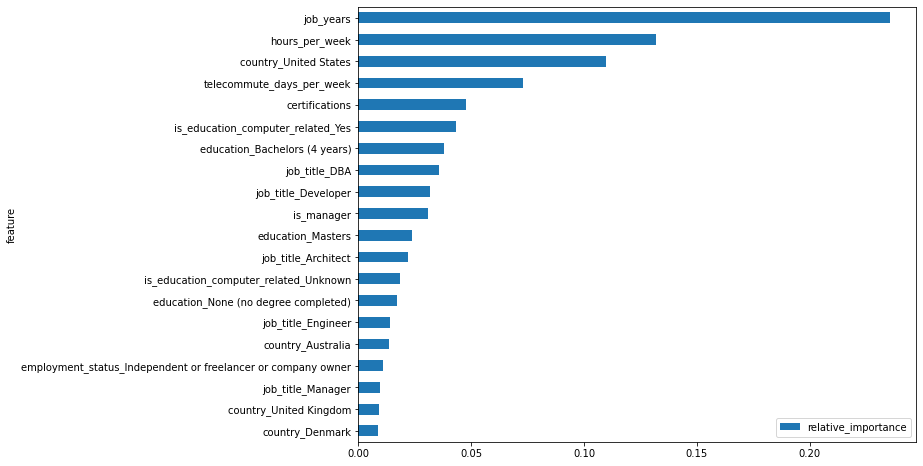

In [ ]:
# compute feature importance from random forest regression model
feature_imp=pd.DataFrame()
for feature,imp in zip(X_train.columns,randomf.feature_importances_):
    temp=pd.DataFrame([feature,imp]).T
    feature_imp=feature_imp.append(temp)
feature_imp.columns=['feature','relative_importance']
feature_imp.sort_values(by='relative_importance',inplace=True)
feature_imp.set_index('feature',inplace=True)
feature_imp.iloc[-20:,:].plot(kind='barh',figsize=(10,8))
plt.show()

In [ ]:
#Small dataset, not many columns, linear regression would be fine. If complicated model, do not recommed.
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Error
print('MAPE for train set:', np.mean(np.abs((y_train - Lin_reg.predict(X_train))) / y_train) * 100)
print('MAPE for validation set:', np.mean(np.abs((y_test - Lin_reg.predict(X_test))) / y_test) * 100)

MAPE for train set: 12.946525690429745
MAPE for validation set: 2169159044152.5654


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `salary` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **salary**

### Encode and Normalize features of Test Data

In [ ]:
# store ids and drop column
test_data = test.copy()
ids = test_data['id']
test_data = test_data.drop(columns=['id', 'timestamp'])

In [ ]:
# encode binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    test_data[c] = test_data[c].replace(to_replace=['Yes'], value=1)
    test_data[c] = test_data[c].replace(to_replace=['No'], value=0)

test_data.shape

(1070, 10)

In [ ]:
encoded_test_data = pd.get_dummies(test_data, columns=cat_cols, drop_first= True)

encoded_test_data.shape

(1070, 79)

In [ ]:
# # adding remaining cols
# for c in test_data.columns:
#     encoded_test_data[c] = test_data[c].values

# print(encoded_test_data.shape)
# print(encoded_test_data.isnull().values.any())

In [ ]:
# standardize test data
encoded_test_data[num_cols] = scaler.transform(encoded_test_data[num_cols])
encoded_test_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,country_Australia,country_Austria,country_Belarus,country_Belgium,country_Bermuda,country_Brazil,country_Bulgaria,country_Canada,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Czech Republic,country_Denmark,country_Dominican Republic,country_El Salvador,country_Finland,country_France,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Jordan,country_Lithuania,country_Luxembourg,country_Macedonia,country_Malaysia,country_Moldova,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Norway,country_Philippines,country_Poland,country_Portugal,country_Romania,country_Russia,country_Serbia and Montenegro,country_Singapore,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Systems Administrator,job_title_Technician,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,5.000000,0,40.000000,5.000000e+00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,10.000000,1,40.000000,1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,3.000000,0,40.000000,8.337746e-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,5.000000,0,40.000000,8.337746e-18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5.000000,1,40.000000,8.337746e-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,4.217063,1,41.016151,1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1066,4.000000,1,37.000000,1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1067,5.000000,0,40.000000,1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1068,4.907064,0,40.727005,8.337746e-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
